<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/sprint_machine_learning_scratch_SVM_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 機械学習スクラッチ SVM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
   

    """
    # 【問題1】ラグランジュの未定乗数法による最急降下
    def _lagrange_gradient_decendent(self, X,y,rambda_val):
        #ラグランジュの未定乗数法による最急降下
        print("rambda_val={}".format(rambda_val.shape))
        self.kernel_X = np.dot(X, X.T) #Xi @ Xj
        if self.verbose:
            print("Xi @ Xj={}".format(self.kernel_X.shape))

        self.kernel_y = np.dot(y, y.T) #yi @ yj
        if self.verbose:
            print("yi @ yj={}".format(self.kernel_y.shape))

        self.theta = self.kernel_y * self.kernel_X #(yi @ yj) * (Xi @ Xj)
        if self.verbose:
            print("(yi @ yj) * (Xi @ Xj)={}".format(self.theta.shape))

        self.theta = np.dot(rambda_val, self.theta) #lambda @ {(yi @ yj) * (Xi @ Xj)}
        if self.verbose:
            print("lambda @ [(yi @ yj) * (Xi @ Xj)]={}".format(self.theta.shape))

        self.theta = np.sum(self.theta) #Σlambda@{(yi @ yj) * (Xi @ Xj)}
        if self.verbose:
            print("Σlambda@[(yi @ yj) * (Xi @ Xj)]={}".format(self.theta))

        self.theta = 1 - self.theta #1-Σlambda@{(yi @ yj) * (Xi @ Xj)}
        if self.verbose:
            print("1-Σlambda@[(yi @ yj) * (Xi @ Xj)]={}".format(self.theta))

        self.theta = self.lr * self.theta #α[1-Σlambda @ {(yi @ yj) * (Xi @ Xj)}]
        if self.verbose:
            print("α[1-Σlambda @ [(yi @ yj) * (Xi @ Xj)]={}".format(self.theta))

        self.theta = rambda_val + self.theta #lambda + α[1-Σlambda @ {(yi @ yj)*(Xi @ Xj)}]

        if self.verbose:
            print("lambda + α[1-Σlambda @ [(yi @ yj) * (Xi @ Xj)]={}".format(self.theta.shape)) 

        return self.theta

    def __init__(self, num_iter, lr, kernel='linear', threshold=0.7, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        
        # 【問題4】学習と推定
        def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.rambda_val = np.random.rand(X.shape[0])
        print("self.rambda_val={}".format(self.rambda_val))
        ## self.rambda_val = np.array([0.50445055, 0.34791371, 0.85681371, 0.77504142, 0.31684812])

        cnt = 0
        while cnt < self.iter:
            self.rambda_val = self._lagrange_gradient_decendent(X, y, self.rambda_val).reshape(-1,1)
            if np.any(self.rambda_val < 0):
                self.rambda_val = np.where(self.rambda_val < 0, 0, self.rambda_val)
                print("{}回目：lambda={}".format(cnt, self.rambda_val))
                break
                
            cnt += 1

        print("X={},y={},self.rambda_val={}".format(X.shape, y.shape, self.rambda_val.shape))
        self.Xy_lambda = np.concatenate([X, y], axis=1)
        self.Xy_lambda = np.concatenate([self.Xy_lambda, self.rambda_val], axis=1)
        print("self.Xy_lambda={}".format(self.Xy_lambda))

        # 【問題3】推定
        def _support_vector_decission(self, X):
        # 【問題2】サポートベクターの決定
        #λと閾値を比較し、閾値よりも大きいIDXをサポートベクターとして保存する。
        self.lambda_sv = self.Xy_lambda[self.Xy_lambda[:,-1] > self.threshold] #tappleで返ってくるので、np.arrayに変換。
        print("self.lambda_sv={},shape={}".format(self.lambda_sv, self.lambda_sv.shape))

        self.lambda_y = (self.lambda_sv[:, -1] * self.lambda_sv[:, -2]).reshape(1, -1)
        print("self.lambda_y={}".format(self.lambda_y.shape))
        self.sn_XT = np.dot(self.lambda_sv[:, 0:-2],  X.T)
        print("self.lambda_sv[:, 0:-2]={}".format(self.lambda_sv[:, 0:-2].shape))
        print("self.Xy_lambda[:, 0:-2].T={}".format(X.T.shape))
        print("self.sn_XT={}".format(self.sn_XT.shape))
        self.lambda_sv_val = np.dot(self.lambda_y, self.sn_XT)
        print("self.lambda_sv_val={}".format(self.lambda_sv_val.shape))
        y_hat = np.sign(self.lambda_sv_val).reshape(-1,1)
        print("np.sign={}".format(y_hat.shape))
        y_hat = np.where(y_hat == -1, 0, 1)
        
        return y_hat
    
    # 【問題3】推定
    def predict(self, X):      
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        y_hat = self._support_vector_decission(X)
        
        return y_hat

### シンプルデータセット1を作成する。

In [ ]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
y_train_reshaped = y_train.reshape(y_train.shape[0],1)

In [ ]:
pd.set_option('max_columns', 1000)
pd.set_option('max_rows', 1000)

In [ ]:
DATA_DIR='C:/Users/es/Documents/Python Scripts/Feb/Week2/'
#X_train.to_csv(f'{DATA_DIR}X_train.csv')

In [ ]:
DATA_DIR='C:/Users/es/Documents/Python Scripts/Feb/Week2/'
#y_train.to_csv(f'{DATA_DIR}y_train.csv')

In [ ]:
svm = ScratchSVMClassifier(num_iter=100, lr=0.0000001, threshold=0.95, verbose=True)

In [ ]:
svm.fit(X_train, y_train_reshaped)

self.rambda_val=[0.78078852 0.64849689 0.12651209 0.86002657 0.6180731  0.9506601
 0.60180257 0.81458512 0.98738334 0.78745161 0.49138007 0.58847251
 0.57324675 0.04945666 0.38529156 0.42227615 0.12963159 0.04130635
 0.0047475  0.35680508 0.24253202 0.55538548 0.92393468 0.03904726
 0.43526616 0.66764572 0.0842075  0.61196976 0.36909894 0.76527036
 0.24761508 0.12349523 0.10704259 0.49476471 0.56206532 0.21878331
 0.55079929 0.71785267 0.24980296 0.01016494 0.83106658 0.84367817
 0.37768062 0.93824377 0.8267966  0.31737375 0.59819252 0.40412155
 0.11686715 0.41248149 0.84365834 0.52310885 0.60840164 0.35987402
 0.17580302 0.57003904 0.55177777 0.95612964 0.00935858 0.89815482
 0.92584707 0.24062384 0.04567708 0.84885978 0.16897605 0.39688418
 0.45319823 0.32499893 0.42652753 0.3112468  0.52522331 0.04001707
 0.59096908 0.15288701 0.9764026  0.64560868 0.00791952 0.03906921
 0.26973119 0.76393639 0.09226435 0.66206741 0.5515756  0.43653239
 0.17733715 0.03271941 0.51236983 0.51460931 0.

In [ ]:
pred = svm.predict(X_test)

self.lambda_sv=[[ 0.80034168 -2.45920655 -1.          0.95532593]
 [ 2.05369045 -0.94718553 -1.          0.952611  ]
 [ 2.75242509 -0.43123816 -1.          0.95100235]
 [-0.41766359  2.54908993  1.          0.95770746]
 [ 2.0103846  -1.12402677 -1.          0.95453636]],shape=(5, 4)
self.lambda_y=(1, 5)
self.lambda_sv[:, 0:-2]=(5, 2)
self.Xy_lambda[:, 0:-2].T=(2, 125)
self.sn_XT=(5, 125)
self.lambda_sv_val=(1, 125)
np.sign=(125, 1)


In [ ]:
y_test = np.where(y_test == -1, 0, 1)

In [ ]:
# 各種評価指標
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, pred)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(y_test, pred)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(y_test, pred)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(y_test, pred)
print('F値: {}'.format(f_value))

正解率: 100.0%
適合率: 100.0%
再現率: 100.0%
F値: 1.0


In [ ]:
# 【問題5】決定領域の可視化
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    plt.scatter(model.lambda_sv[:,0], model.lambda_sv[:, 1], s=80, color='yellow', label='SV', marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

self.lambda_sv=[[ 0.80034168 -2.45920655 -1.          0.95532593]
 [ 2.05369045 -0.94718553 -1.          0.952611  ]
 [ 2.75242509 -0.43123816 -1.          0.95100235]
 [-0.41766359  2.54908993  1.          0.95770746]
 [ 2.0103846  -1.12402677 -1.          0.95453636]],shape=(5, 4)
self.lambda_y=(1, 5)
self.lambda_sv[:, 0:-2]=(5, 2)
self.Xy_lambda[:, 0:-2].T=(2, 910798)
self.sn_XT=(5, 910798)
self.lambda_sv_val=(1, 910798)
np.sign=(910798, 1)


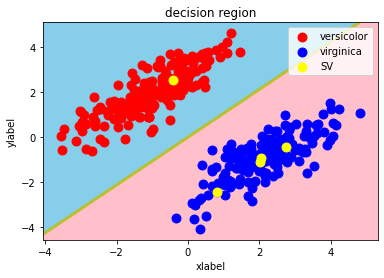

In [ ]:
decision_region(X_train, y_train, svm)